In [1]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

path = "cardata.csv"
df = pd.read_csv(path)
#to describe the dataframe
df.describe()
# to determine shape of dataframe
df.shape
#extra info about the dataset
df.info()
#to check null values in dataset
df.isnull()
df.isnull().sum()

plt.hist(df["AQI"])
plt.xlabel("Date")
plt.ylabel("AQI Count")
plt.show()




FileNotFoundError: [Errno 2] No such file or directory: 'cardata.csv'

In [2]:
X=df.iloc[:, 1:-2] #except last 2 columns
y=df.iloc[:, 13:14] #only 13th column


In [3]:
y

,AQI
0,179.000000
1,162.000000
2,76.000000
3,140.000000
4,128.000000
...,...
5206,509.649077
5207,495.778620
5208,473.312645
5209,456.592219


splitting of dataset

In [4]:
df_x, df_x1, df_y, df_y1= train_test_split(X,y,test_size=0.3, random_state=42)
#df.drop(["City"], axis=1, inplace=True)
df_x["Date"] = pd.to_datetime(df_x["Date"]) #convert object to workable datatype acc to panda [datetime]
df_x1["Date"] = pd.to_datetime(df_x["Date"])
df_x["Date"] = pd.to_datetime(df_x["Date"])
df_x1["Date"] = pd.to_datetime(df_x["Date"])
X_train = df_x.drop(['Date'], axis = 1) #axis=1 means removing column
y_train = df_y["AQI"]
X_test = df_x1.drop(['Date'], axis = 1)
y_test = df_y1["AQI"]

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_x = StandardScaler() #standardize x values->normalize data->no bias
sc_y = StandardScaler()
X_train = sc_x.fit_transform(X_train) #use fit_transform for train and transform for test
X_test=sc_x.transform(X_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1)) #want numpy to determine what would be the dimension of y_train
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [6]:
df.head() #first 5 rows
rf=RandomForestRegressor(n_estimators = 1000, random_state = 42) #n_estimators->the number of trees you want to build before taking the maximum voting or averages of predictions.
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
y_test

array([[ 1.6109555 ],
       [-1.14843793],
       [-1.10490712],
       ...,
       [ 0.69354109],
       [-0.83776181],
       [-1.09932092]])

calculating metrics


In [7]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
score = r2_score(y_test,y_pred)
mean_error = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("R2 SCORE is", score)
print("mean_sqrd_error is ", mean_error)
print("Root mean squared error of is",np.sqrt(mean_error))
print("Mean Absolute error is", mae)
print("Accuracy is", 1 - mae)

R2 SCORE is 0.9961244663929671
mean_sqrd_error is  0.00394442090102074
Root mean squared error of is 0.06280462483783134
Mean Absolute error is 0.023919141242369213
Accuracy is 0.9760808587576308


In [8]:
y_test.reshape(-1,1) #specifies the new shape of the array w/o changing data inside
y_test

array([[ 1.6109555 ],
       [-1.14843793],
       [-1.10490712],
       ...,
       [ 0.69354109],
       [-0.83776181],
       [-1.09932092]])

In [9]:
y_pred.reshape(-1,1)

array([[ 1.61040986],
       [-1.14023533],
       [-1.10532641],
       ...,
       [ 0.69307787],
       [-0.82605553],
       [-1.10229647]])

plotting graphs

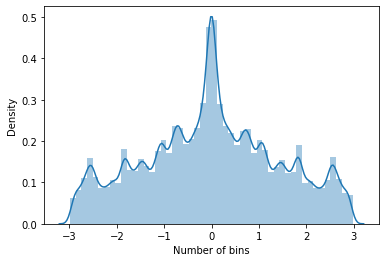

In [10]:
predictions = rf.predict(X_test)
fig = sns.distplot(y_test-predictions) #using the seaborn library we create an histogram of predicted values
plt.xlabel("Number of bins")
plt.ylabel("Density")
plt.show(fig) 

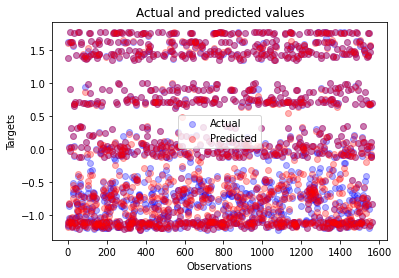

In [11]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Targets')
plt.legend()
plt.show()

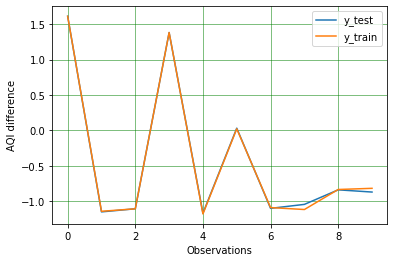

In [12]:
plt.plot(y_test.reshape(-1,1)[0:10])
plt.plot(y_pred.reshape(-1,1)[0:10])
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Observations')
plt.ylabel('AQI difference')
plt.gca().legend(('y_test','y_train'))
plt.show()


In [13]:
result = pd.DataFrame()
result["ACTUAL AQI"] = y_test.flatten()
result["PREDICTED AQI"] = y_pred
result["DIFFERENCE"] = result["ACTUAL AQI"] - result["PREDICTED AQI"]
result["ACC OR NOT"] = np.where(abs(result["DIFFERENCE"])<= 0.5, "Accurate", "Inaccurate")
result["PERCENTAGE ERROR"] = ( abs(result["ACTUAL AQI"] - result["PREDICTED AQI"] ) / result["ACTUAL AQI"] ) * 100
result.head(21)

,ACTUAL AQI,PREDICTED AQI,DIFFERENCE,ACC OR NOT,PERCENTAGE ERROR
0,1.610955,1.610410,0.000546,Accurate,0.033871
1,-1.148438,-1.140235,-0.008203,Accurate,-0.714239
2,-1.104907,-1.105326,0.000419,Accurate,-0.037948
3,1.381118,1.381198,-0.000080,Accurate,0.005800
4,-1.167078,-1.177269,0.010191,Accurate,-0.873199
5,0.032138,0.022887,0.009252,Accurate,28.787401
6,-1.098730,-1.087900,-0.010830,Accurate,-0.985692
7,-1.042808,-1.115252,0.072444,Accurate,-6.947030
8,-0.837762,-0.832729,-0.005033,Accurate,-0.600762
9,-0.868829,-0.816238,-0.052591,Accurate,-6.053116
